<a href="https://colab.research.google.com/github/nicole-yoong/Portfolio/blob/main/Hypothesis_Testing/Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [ ]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Read dataset

In [ ]:
# x: length mm, y: width mm, z: depth mm
df = pd.read_csv('/content/drive/MyDrive/Python/Case Studies/Datasets/diamonds.csv')
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Correlation

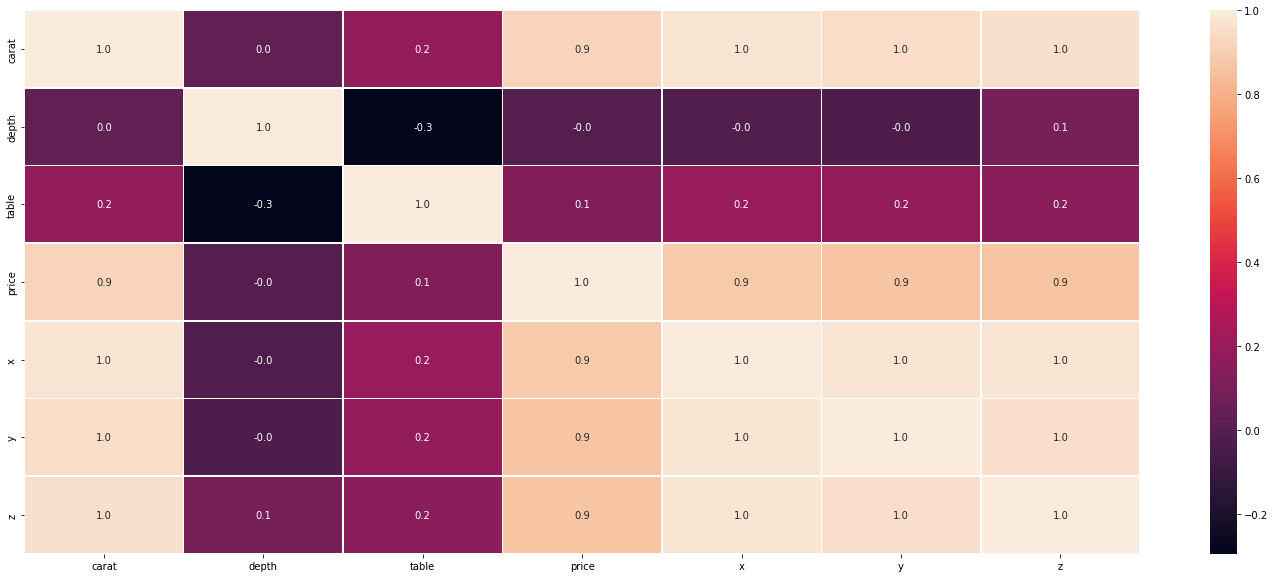

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')

## Regression Red plot

<function print>

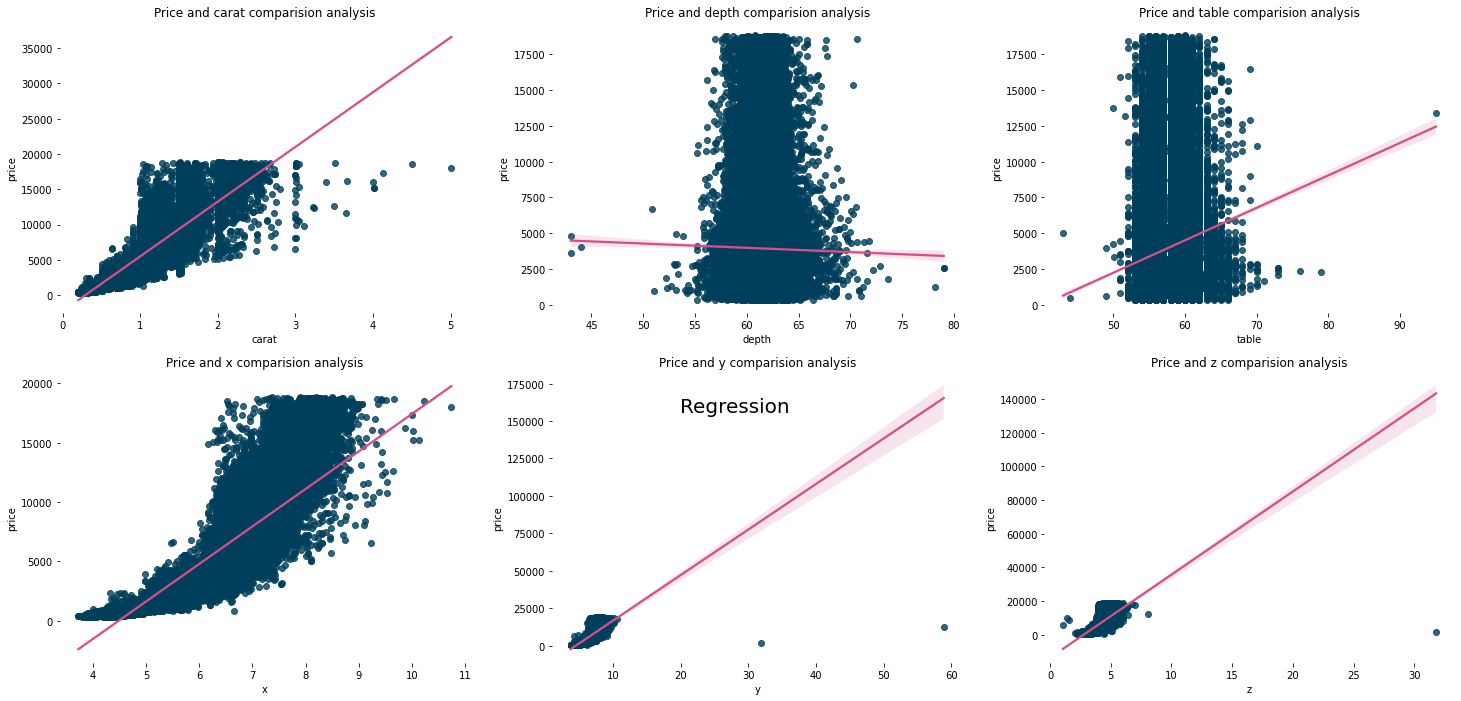

In [ ]:
X = df.loc[:, ~df.columns.isin(['price'])].select_dtypes(exclude='object').columns.to_list()
j = 0
fig = plt.figure(figsize = (25,10))
fig.tight_layout(h_pad = 2)

plt.suptitle("Regression", size = 20)
plt.subplots_adjust(top = 1.5)

for i in X:
    ax=plt.subplot(331+j)
    ax=sns.regplot(data = df, x = i, y='price', color = '#003f5c', line_kws={'color':'#d45087'})
    ax.set_title("Price and {} comparision analysis".format(i), size = 12)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1
    print
print



## Distribution Box plot

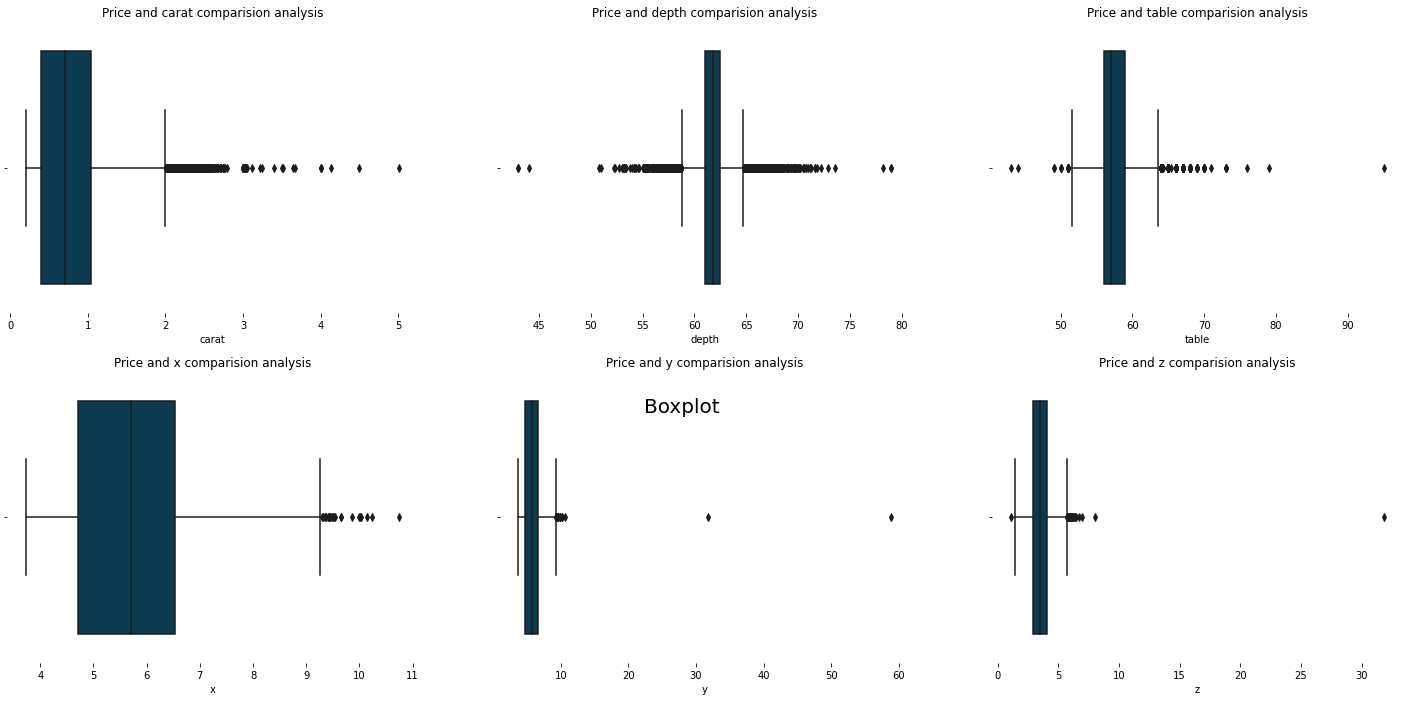

In [ ]:
X = df.loc[:, ~df.columns.isin(['price'])].select_dtypes(exclude='object').columns.to_list()
j = 0
fig = plt.figure(figsize = (25,10))
fig.tight_layout(h_pad = 2)

plt.suptitle('Boxplot', size = 20)
plt.subplots_adjust(top = 1.5)

for i in X:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data = df, x = i, color = '#003f5c')
    ax.set_title("Price and {} comparision analysis".format(i), size = 12)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1

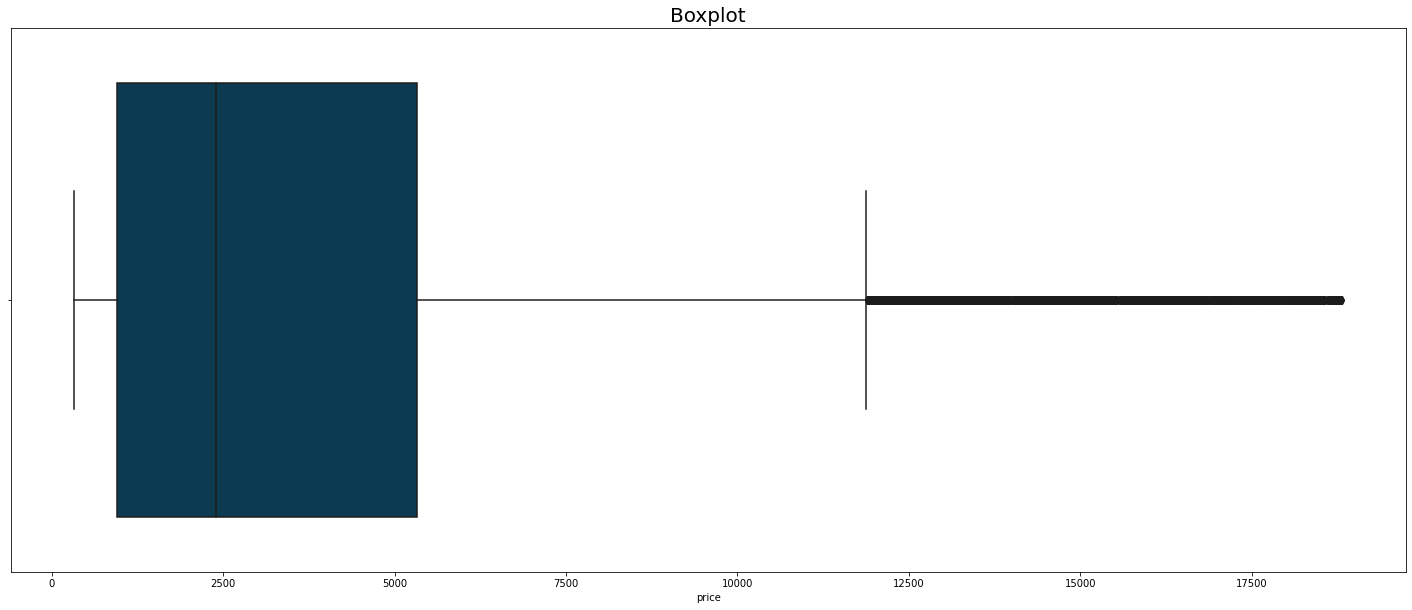

In [ ]:
fig = plt.figure(figsize = (25,10))
plt.title('Boxplot', size = 20)
sns.boxplot(data = df, x = 'price', color = '#003f5c')

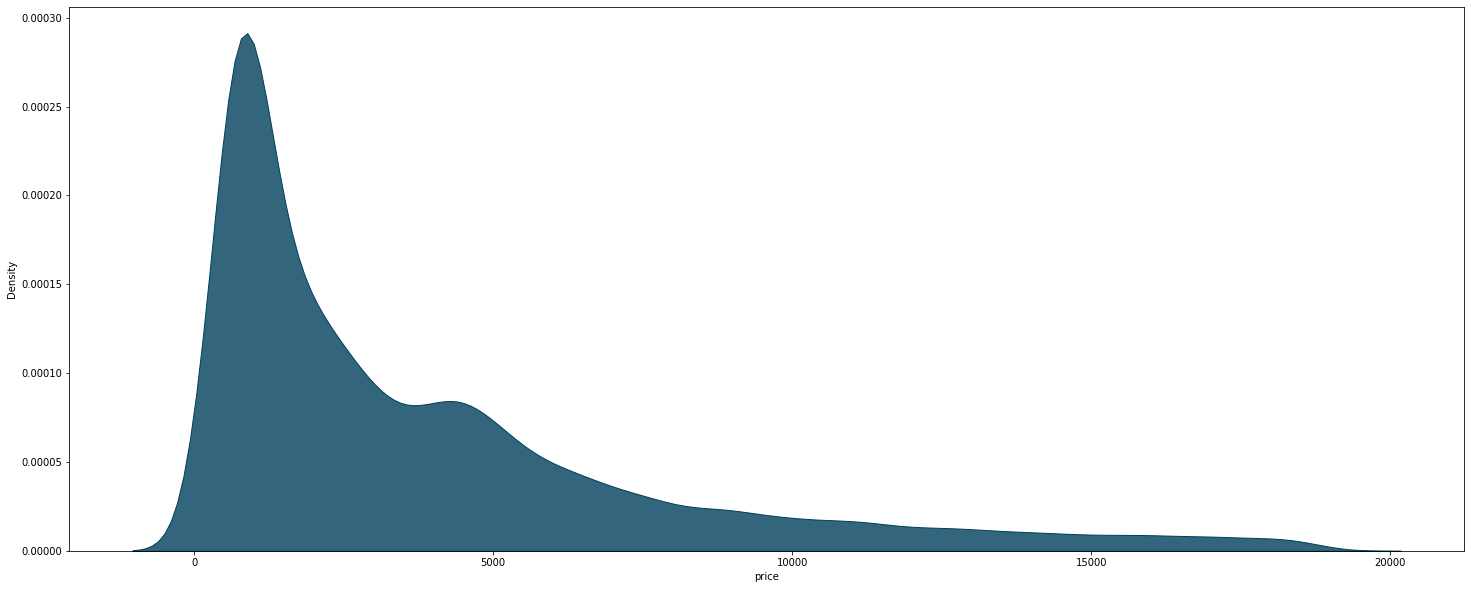

In [ ]:
fig=plt.figure(figsize=(25,10))
fig.tight_layout(h_pad = 2)

sns.kdeplot(df['price'], fill = True, color = '#003f5c', alpha=0.8)

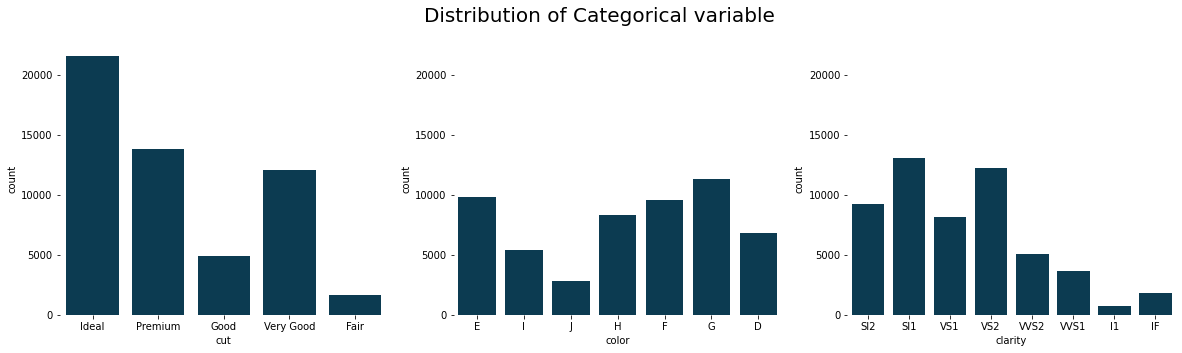

In [ ]:
X=df.select_dtypes(include='object').columns.to_list()

fig=plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Categorical variable", size=20)
ax1=plt.subplot(131)
sns.countplot(data=df, x=X[0], ax=ax1, linewidth=2, color = '#003f5c')
for s in ['left','right','top','bottom']:
        ax1.spines[s].set_visible(False)
ax2=plt.subplot(132, sharey=ax1)
sns.countplot(data=df, x=X[1], ax=ax2,linewidth=2, color = '#003f5c')
for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
ax3=plt.subplot(133, sharey=ax1)
sns.countplot(data=df, x=X[2], ax=ax3,linewidth=2, color = '#003f5c')
for s in ['left','right','top','bottom']:
        ax3.spines[s].set_visible(False)

# Statistical analysis - compare price with features 

https://www.kaggle.com/code/hamelg/python-for-data-24-hypothesis-testing/notebook#Next-Lesson:-Python-for-Data-25:-Chi-Squared-Tests

## Import modules

In [ ]:
import scipy.stats as stats
import scipy.stats as probplot
import scipy.stats as f_oneway
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import kruskal
from scipy.stats import pearsonr

import math
from numpy import median
from numpy import std

## Two sampled T-test

Compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. 

### Normality Assumption Check `(FAIL)`

The samples are random and independent samples. 

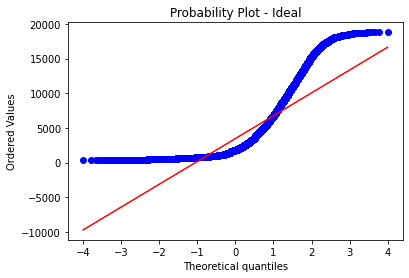

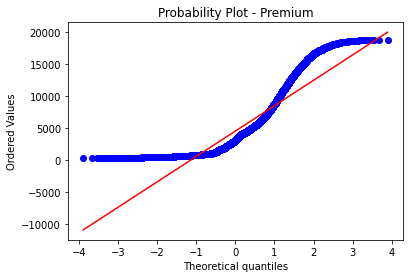

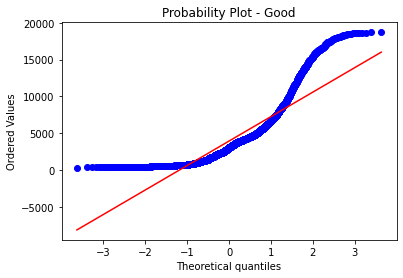

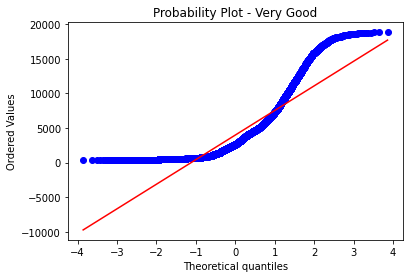

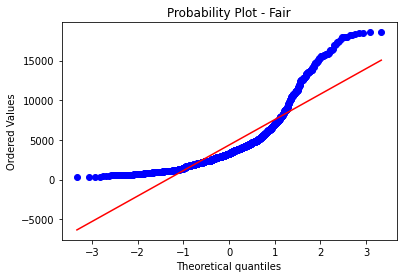

In [ ]:
unique_cut = df['cut'].unique()
for x in unique_cut:
    stats.probplot(df[df['cut'] == x]['price'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  x)
    plt.show()

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we cannot assume that the data for each group falls roughly on a straight line.

### Homogeneity of variance Assumption Check (FAIL)

In [ ]:
ratio = df.groupby('cut').std().max() / df.groupby('cut').std().min()
ratio

carat    1.193394
depth    5.068237
table    3.163017
price    1.219809
x        1.245642
y        1.331889
z        1.132430
dtype: float64

The ratio of the largest to the smallest sample standard deviation is 2.71. That is more than the threshold of 2. Thus, we conclude that the assumptions are not fulfilled.

### Homogeneity using Levene (FAIL)

In [ ]:
from scipy.stats import levene

# H0 (null hypothesis): The depth and table have equal variance.
# H1 (null hypothesis): The depth and table do not have equal variance.


stat, p = levene(df.depth, df.table)
print('Statistics = %.3f, p = %.3f' % (stat, p))
stat, p = stats.ttest_ind(df.depth, df.table)
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

# The depth and table do not have equal variance.

Statistics = 8161.748, p = 0.000
Statistics = 375.609, p = 0.000
Reject Null Hypothesis.


### Scipy

In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ttest_ind # both scipy and statsmodels work the same 

# H0 (null hypothesis): The impact of depth and table on price are equal i.e., μ1 = μ2
# H1 (null hypothesis): The impact of depth and table on price is not equal i.e., μ1 ≠ μ2.

stat, p = stats.ttest_ind(df.depth, df.table)
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

# The impact of depth and table on price is not equal i.e., μ1 ≠ μ2.

Statistics = 375.609, p = 0.000
Reject Null Hypothesis.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# H0 (null hypothesis): The impact of x and y on price are equal i.e., μ1 = μ2
# H1 (null hypothesis): The impact of x and y on price is not equal i.e., μ1 ≠ μ2.

stat, p = stats.ttest_ind(df.x, df.y)
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

# The impact of x and y on price are equal i.e., μ1 = μ2

Statistics = -0.474, p = 0.636
Accept Null Hypothesis


In [ ]:
# H0 (null hypothesis): The impact of x and z on price are equal i.e., μ1 = μ2
# H1 (null hypothesis): The impact of x and z on price is not equal i.e., μ1 ≠ μ2.

stat, p = stats.ttest_ind(df.x, df.z)
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

# The impact of x and z on price is not equal i.e., μ1 ≠ μ2.

Statistics = 385.060, p = 0.000
Reject Null Hypothesis.


The test yields a p-value of 0.0, which means there is a 0% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

## Anova

### One Way F-test(Anova)

It tell whether two or more groups are similar or not based on their mean similarity and f-score.

*** to compare more than two groups at the same time

In [ ]:
# H0 (null hypothesis): The impact of depth and table on price are equal i.e., μ1 = μ2
# H1 (null hypothesis): The impact of depth and table on price is not equal i.e., μ1 ≠ μ2.

stat, p = stats.f_oneway(df.depth, df.table)
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Statistics = 141082.431, p = 0.000
Reject Null Hypothesis.


In [ ]:
# H0 (null hypothesis): The impact of x and y on price are equal i.e., μ1 = μ2
# H1 (null hypothesis): The impact of x and y on price is not equal i.e., μ1 ≠ μ2.

stat, p = stats.f_oneway(df.x, df.y)
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

# The impact of x and y on price are equal i.e., μ1 = μ2

Statistics = 0.224, p = 0.636
Accept Null Hypothesis


In [ ]:
# H0 (null hypothesis): The impact of Premium cut and Fair cut on price are equal i.e., μ1 = μ2
# H1 (null hypothesis): The impact of Premium cut and Fair cut on price is not equal i.e., μ1 ≠ μ2.

grps = pd.unique(df['cut'].values)
grps

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
d_data = {grp:df['price'][df['cut'] == grp] for grp in grps}

stat, p = stats.f_oneway(d_data['Premium'], d_data['Fair'])
print('Statistics = %.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

# The impact of Premium cut and Fair cut on price is not equal i.e., μ1 ≠ μ2.

Statistics = 3.903, p = 0.048
Reject Null Hypothesis.


In [ ]:
stat, p = stats.f_oneway(d_data['Premium'], d_data['Good'], d_data['Fair'])
print('Statistics = %.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Statistics = 45.268, p = 0.000
Reject Null Hypothesis.


If the p-value from the ANOVA is less than the significance level, we can reject the null hypothesis and conclude that we have sufficient evidence to say that at least one of the means of the groups is different from the others.

However, this doesn’t tell us which groups are different from each other. It simply tells us that not all of the group means are equal.

### Anova using statsmodels ols() and anova_lm()

In [ ]:
import statsmodels.api as stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

formula='price ~ C(cut)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))

if np.round(model.f_pvalue,2) < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

                sum_sq       df        F  PR(>F)
C(cut)    1.096482e+10      4.0  174.641     0.0
Residual  8.462613e+11  53915.0      NaN     NaN
Reject Null Hypothesis


In [ ]:
formula='price ~ C(x)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))

if np.round(model.f_pvalue,2) < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

                sum_sq       df        F  PR(>F)
C(x)      7.507320e+11    552.0  681.542     0.0
Residual  1.064941e+11  53367.0      NaN     NaN
Reject Null Hypothesis


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     681.5
Date:                Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:51:47   Log-Likelihood:            -4.6732e+05
No. Observations:               53920   AIC:                         9.358e+05
Df Residuals:                   53367   BIC:                         9.407e+05
Df Model:                         552                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       367.0000    998.876      0.367      0.713   -1590.805    2324.805
C(x)[T.3.74]  -3.789e-10   1730.104  -2.19e-13      1.000   -3391.018    3391.018
C(x)[T.3.76]   -1.46e-09   1730.104  -8.44e-13      1.000   -3391.018    3391.018
C(x)[T.3.77]   3.632e-10   1730.104    2.1e-13      1.000   -3391.018    3391.018
C(x)[T.3.79]    -11.0000   1412.624     -0.008      0.994   -2779.754    2757.754
C(x)[T.3.81]   5.865e-10   1289.543   4.55e-13      1.000   -2527.515    2527.515
C(x)[T.3.82]     19.0000   1412.624      0.013      0.989   -2749.754    2787.754
C(x)[T.3.83]     68.0000   1289.543      0.053      0.958   -2459.515    2595.515
C(x)[T.3.84]     17.0000   1223.368      0.014      0.989   -2380.812    2414.812
C(x)[T.3.85]     81.6667   1153.402      0.071      0.944   -2179.012    2342.345
C(x)[T.3.86]     49.4000   1181.886      0.042      0.967   -2267.106    2365.906
C(x)[T.3.87]     49.3333   1153.402      0.043      0.966   -2211.345    2310.012
C(x)[T.3.88]     60.5455   1085.892      0.056      0.956   -2067.813    2188.904
C(x)[T.3.89]     98.0000   1085.892      0.090      0.928   -2030.358    2226.358
C(x)[T.3.9]     115.9524   1045.360      0.111      0.912   -1932.961    2164.866
C(x)[T.3.91]     95.8095   1045.360      0.092      0.927   -1953.104    2144.723
C(x)[T.3.92]    136.4444   1026.247      0.133      0.894   -1875.009    2147.898
C(x)[T.3.93]    110.9524   1022.382      0.109      0.914   -1892.925    2114.830
C(x)[T.3.94]    119.3556   1020.832      0.117      0.907   -1881.483    2120.194
C(x)[T.3.95]    113.8864   1021.325      0.112      0.911   -1887.920    2115.692
C(x)[T.3.96]    118.2917   1019.473      0.116      0.908   -1879.885    2116.468
C(x)[T.3.97]    125.5122   1022.949      0.123      0.902   -1879.476    2130.500
C(x)[T.3.98]    125.9714   1027.019      0.123      0.902   -1886.994    2138.937
C(x)[T.3.99]    151.2500   1016.556      0.149      0.882   -1841.209    2143.709
C(x)[T.4.0]     148.7317   1022.949      0.145      0.884   -1856.256    2153.719
C(x)[T.4.01]    182.0263   1024.825      0.178      0.859   -1826.639    2190.692
C(x)[T.4.02]    145.6000   1023.543      0.142      0.887   -1860.553    2151.753
C(x)[T.4.03]    165.6341   1022.949      0.162      0.871   -1839.354    2170.622
C(x)[T.4.04]    167.9388   1019.057      0.165      0.869   -1829.422    2165.299
C(x)[T.4.05]    157.6389   1026.247      0.154      0.878   -1853.814    2169.092
C(x)[T.4.06]    160.6316   1024.825      0.157      0.875   -1848.034    2169.297
C(x)[T.4.07]    162.6250   1019.473      0.160      0.873   -1835.551    2160.801
C(x)[T.4.08]    169.1800   1018.657      0.166      0.868   -1827.397    2165.757
C(x)[T.4.09]    179.6098   1022.949      0.176      0.861   -1825.378    2184.598
C(x)[T.4.1]     211.1800   1018.657      0.207   

### Post Hoc Tests (multiple comparison test)

https://pythonawesome.com/multiple-pairwise-comparisons-post-hoc-tests-in-python/

In [ ]:
!pip install scikit-posthocs

     |████████████████████████████████| 43 kB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=e16fe4ccf07ad6b0a020cb5ef6e141091aeeb9665e27e9b0f3fbe79829457a04
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [ ]:
import scikit_posthocs as sp

In [ ]:
formula='price ~ C(cut)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))

if np.round(model.f_pvalue,2) < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

                sum_sq       df        F  PR(>F)
C(cut)    1.096482e+10      4.0  174.641     0.0
Residual  8.462613e+11  53915.0      NaN     NaN
Reject Null Hypothesis


The results tell us that there is a significant difference between groups means (p = 0.0), but does not tell us the exact group pairs which are different in means. To obtain pairwise group differences, we will carry out a posteriori (post hoc) analysis using scikits-posthocs package.

In [ ]:
sp.posthoc_ttest(df, val_col='price', group_col='cut', p_adjust='holm')

,Ideal,Premium,Good,Very Good,Fair
Ideal,1.000000e+00,6.695013e-142,2.337527e-14,4.913990e-32,2.534687e-19
Premium,6.695013e-142,1.000000e+00,4.266471e-20,8.028550e-30,9.643377e-02
Good,2.337527e-14,4.266471e-20,1.000000e+00,3.982665e-01,1.585486e-04
Very Good,4.913990e-32,8.028550e-30,3.982665e-01,1.000000e+00,8.303929e-04
Fair,2.534687e-19,9.643377e-02,1.585486e-04,8.303929e-04,1.000000e+00


Remember to use a FWER controlling procedure, such as Holm procedure, when making multiple comparisons. As seen from this table, significant differences in group means are obtained for all group pairs.

### Non-parametric ANOVA with post hoc tests (when assumptions are violated)

If normality and other assumptions are violated, one can use a non-parametric Kruskal-Wallis H test (one-way non-parametric ANOVA) to test if samples came from the same distribution.

In [ ]:
import scipy.stats as stats
from scipy.stats.mstats import kruskal

data = [df.loc[ids, 'price'].values for ids in df.groupby('cut').groups.values()]
stat, p = stats.kruskal(*data)
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Statistics = 975.525, p = 0.000
Reject Null Hypothesis.


In [ ]:
sp.posthoc_conover(df, val_col='price', group_col='cut', p_adjust='holm')

,Fair,Good,Ideal,Premium,Very Good
Fair,1.000000e+00,1.087281e-18,1.496950e-69,1.687625e-08,5.957244e-30
Good,1.087281e-18,1.000000e+00,3.405470e-36,4.883892e-10,5.018372e-03
Ideal,1.496950e-69,3.405470e-36,1.000000e+00,8.298604e-173,9.020411e-41
Premium,1.687625e-08,4.883892e-10,8.298604e-173,1.000000e+00,3.505306e-34
Very Good,5.957244e-30,5.018372e-03,9.020411e-41,3.505306e-34,1.000000e+00


Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of cut and conclude that all groups (cut) differ in their price.

## Rank Significance Tests - Mann-Whitney's test

We use the Mann-Whitney's test to determine whether one group has higher or lower price than the other group. Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

Example:
Find if the average income of PhD owners is statistically different from the average income of Master owners.

### Does color affect price?

In [ ]:
# Does color affect price?
# df.color.unique() >>> array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)
# H0 : The mean ranks of the two groups are equal
# H1 : The mean ranks of the two groups are not equal

In [ ]:
data = df[['color','price']]

E = data[data['color'] == 'E']
I = data[data['color'] == 'I']
J = data[data['color'] == 'J']
H = data[data['color'] == 'H']
F = data[data['color'] == 'F']
G = data[data['color'] == 'G']
D = data[data['color'] == 'D']

In [ ]:
# Find if the average price of color E is statistically different from the average price of color I 

stat, p = shapiro(E.price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Statistics=0.729, p=0.000
Reject Null Hypothesis.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
stat, p = shapiro(I.price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Statistics=0.854, p=0.000
Reject Null Hypothesis.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# summarize
print('E: median = %.0f stdv = %.1f' % (median(E.price), std(E.price)))
print('I: median = %.0f stdv = %.1f' % (median(I.price), std(I.price)))

print(stats.mannwhitneyu(E.price, I.price))

alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

E: median = 1739 stdv = 3344.0
I: median = 3730 stdv = 4720.3
MannwhitneyuResult(statistic=20209224.0, pvalue=2.5109082268204678e-132)
Reject Null Hypothesis.


The p-value is inferior than the significance level of 5%, we can reject the null hypothesis.

We can conclude that the average price of color E is different from the average income of color I at a 95% confidence level

### Does cut affect price?

In [ ]:
# df.cut.unique() >>> array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

data = df[['cut','price']]

Premium = data[data['cut'] == 'Premium']
Fair = data[data['cut'] == 'Fair']

In [ ]:
stat, p = shapiro(Premium.price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Statistics=0.835, p=0.000
Reject Null Hypothesis.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
stat, p = shapiro(Fair.price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Statistics=0.810, p=0.000
Reject Null Hypothesis.


In [ ]:
# summarize
print('Premium: median = %.0f stdv = %.1f' % (median(Premium.price), std(Premium.price)))
print('Fair: median = %.0f stdv = %.1f' % (median(Fair.price), std(Fair.price)))

print(stats.mannwhitneyu(Premium.price, Fair.price))

alpha = 0.05
if p > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis.')

Premium: median = 3182 stdv = 4343.7
Fair: median = 3282 stdv = 3560.0
MannwhitneyuResult(statistic=10350341.0, pvalue=6.424642018294703e-06)
Reject Null Hypothesis.


## Rank Correlation Tests - Spearman Rank Correlation test

We use the Spearman rank correlation test to determine if our two variables are correlated. This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (Accept null hypothesis).

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.select_dtypes('object').columns.to_list()

label_df = df.copy()
label_encoder = LabelEncoder()
for col in X:
    label_df[col] = label_encoder.fit_transform(label_df[col])
label_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# H0 : There is no monotonic association between price and cut
# H1 : There is a monotonic association between price and cut

data = df[['cut','price']]

cor, pval = stats.spearmanr(data[['cut']], data[['price']])
print("Spearman correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pval))

Spearman correlation test : correlation coefficient : 0.0382, pval: 0.0000


The closer Rs (correlation coefficient) is to +1 or -1, the stronger the likely correlation. A perfect positive correlation is +1 and a perfect negative correlation is -1. The Rs value of 0.8466 suggests a fairly strong positive relationship.

The high correlation coefficient induces a strong positive relationship between the two variables, confirming our alternative hypothesis.

In [ ]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table',
           'x', 'y', 'z']
for x in columns:
  data = df[[x,'price']]
  cor, pval = stats.spearmanr(data[[x]], data[['price']])
  print (x + '' + ': ' + 'Spearman correlation test : correlation coefficient : %.4f, pval: %.4f' % (cor, pval))

carat: Spearman correlation test : correlation coefficient : 0.9629, pval: 0.0000
cut: Spearman correlation test : correlation coefficient : 0.0382, pval: 0.0000
color: Spearman correlation test : correlation coefficient : 0.1500, pval: 0.0000
clarity: Spearman correlation test : correlation coefficient : -0.1162, pval: 0.0000
depth: Spearman correlation test : correlation coefficient : 0.0100, pval: 0.0201
table: Spearman correlation test : correlation coefficient : 0.1718, pval: 0.0000
x: Spearman correlation test : correlation coefficient : 0.9638, pval: 0.0000
y: Spearman correlation test : correlation coefficient : 0.9632, pval: 0.0000
z: Spearman correlation test : correlation coefficient : 0.9586, pval: 0.0000


In [ ]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table',
           'x', 'y', 'z']
for x in columns:
  data = label_df[[x,'price']]
  cor, pval = stats.spearmanr(data[[x]], data[['price']])
  print (x + '' + ': ' + 'Spearman correlation test : correlation coefficient : %.4f, pval: %.4f' % (cor, pval))

carat: Spearman correlation test : correlation coefficient : 0.9629, pval: 0.0000
cut: Spearman correlation test : correlation coefficient : 0.0382, pval: 0.0000
color: Spearman correlation test : correlation coefficient : 0.1500, pval: 0.0000
clarity: Spearman correlation test : correlation coefficient : -0.1162, pval: 0.0000
depth: Spearman correlation test : correlation coefficient : 0.0100, pval: 0.0201
table: Spearman correlation test : correlation coefficient : 0.1718, pval: 0.0000
x: Spearman correlation test : correlation coefficient : 0.9638, pval: 0.0000
y: Spearman correlation test : correlation coefficient : 0.9632, pval: 0.0000
z: Spearman correlation test : correlation coefficient : 0.9586, pval: 0.0000


## Pearson Correlation

In [ ]:
cor, pval = pearsonr(df.price, df.x)
print("Pearson correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pval))

Pearson correlation test : correlation coefficient : 0.8872, pval: 0.0000


In [ ]:
cor, pval = pearsonr(df.price, df.y)
print("Pearson correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pval))

Pearson correlation test : correlation coefficient : 0.8679, pval: 0.0000


In [ ]:
cor, pval = pearsonr(df.price, df.z)
print("Pearson correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pval))

Pearson correlation test : correlation coefficient : 0.8682, pval: 0.0000


In [ ]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

## Chi-square test for independance

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [ ]:
# H0 : Clarity and cut are independent
# H1 : Clarity and cut are not independent

data = df[['clarity','cut']]
crosstab = pd.crosstab(data['clarity'], data['cut'])
crosstab

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,210,95,146,203,84
IF,9,71,1212,230,268
SI1,408,1560,4282,3573,3240
SI2,466,1078,2597,2944,2100
VS1,169,648,3589,1989,1775
VS2,261,978,5069,3356,2590
VVS1,17,186,2047,615,789
VVS2,69,286,2606,870,1235


In [ ]:
# Degrees of freedom

stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)

Degress of freedom = 28


In [ ]:
print(expected)

[[  22.02229228   67.09339763  294.92626113  188.60608309  165.35196588]
 [  53.41450297  162.73330861  715.33605341  457.45919881  401.0569362 ]
 [ 389.80650964 1187.58950297 5220.35467359 3338.42989614 2926.81941766]
 [ 274.08503338  835.03097181 3670.59310089 2347.35348665 2057.93740727]
 [ 243.79692136  742.75482196 3264.96958457 2087.95623145 1830.52244065]
 [ 365.66554154 1114.04132047 4897.05474777 3131.67878338 2745.55960682]
 [ 109.03720326  332.19413947 1460.24465875  933.83011869  818.69387982]
 [ 151.17199555  460.56253709 2024.52091988 1294.68620178 1135.0583457 ]]


In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=41.337, stat=4395.819


In [ ]:
if abs(stat) >= critical:
	print('Reject null hypothesis')
else:
	print('Independent. Accept null hypothesis')
 
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent. Reject null hypothesis')
else:
	print('Independent. Accept null hypothesis')

Reject null hypothesis
significance=0.050, p=0.000
Dependent. Reject null hypothesis


We can interpret the results by two ways :

The P-value is less than the significance level of 5%, we reject the null hypothesis.

The Test-statistic is more than the critical value, we reject the null hypothesis.

We can conclude that the clarity is dependent from the cut owned at a 95% confidence level.

## Shapiro normal distribution test

In [ ]:
# H0 : Population is normally distributed. 
# H1 : Population is not normally distributed. 

X = df.loc[:, ~df.columns.isin(['price'])].select_dtypes(exclude='object')

column_dict= {elem : pd.DataFrame() for elem in X}

def shapiro_test(data):
    stat, p = shapiro(data)
    print('%s : Statistics=%.3f, p=%.3f' % (column,stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian. Accept Null Hypothesis')
    else:
        print('Sample does not look Gaussian. Reject Null Hypothesis.')

for column in X:
    column_dict[column] = df[column]
    shapiro_test(column_dict[column])

carat : Statistics=0.894, p=0.000
Sample does not look Gaussian. Reject Null Hypothesis.
depth : Statistics=0.953, p=0.000
Sample does not look Gaussian. Reject Null Hypothesis.
table : Statistics=0.954, p=0.000
Sample does not look Gaussian. Reject Null Hypothesis.
x : Statistics=0.956, p=0.000
Sample does not look Gaussian. Reject Null Hypothesis.
y : Statistics=0.918, p=0.000
Sample does not look Gaussian. Reject Null Hypothesis.
z : Statistics=0.933, p=0.000
Sample does not look Gaussian. Reject Null Hypothesis.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
